In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
import json
f = open("/content/drive/MyDrive/Finance QA/data/valid_unfiltered_qa_pairs_with_data.json",)
data = json.load(f)

print(len(data))
f.close()

5296


In [ ]:
pprint(data[0].keys())

dict_keys(['title', 'executives', 'analysts', 'expo', 'Q_A_pairs'])


In [ ]:
pprint(data[0]['expo'])

['United Continental Holdings, Inc. (NASDAQ:UAL) Q1 2017 Results Earnings '
 'Conference Call April 18, 2017 10:30 AM ET',
 'Executives',
 'Julie Yates Stewart - Managing Director, IR',
 'Oscar Munoz - CEO',
 'Scott Kirby - President',
 'Andrew Levy - EVP and CFO',
 'Gregory Hart - EVP and COO',
 'Analysts',
 'Helane Becker - Cowen and Company',
 'Kevin Crissey - Citigroup',
 'Michael Linenberg - Deutsche Bank',
 'Hunter Keay - Wolfe Research',
 'Savanthi Syth - Raymond James',
 'Darryl Genovesi - UBS',
 'Jamie Baker - JPMorgan',
 'Joseph DeNardi - Stifel & Nicolaus & Co.',
 'Brandon Oglenski - Barclays Capital',
 'Andrew George Didora - Bank of America Merrill Lynch',
 'Rajeev Lalwani - Morgan Stanley',
 'Duane Pfennigwerth - Evercore ISI',
 'David Koenig - Associated Press',
 'Michael Sasso - Bloomberg News',
 'Ted Reed - THE STREET',
 'Edward Russell - Flightglobal',
 'Operator',
 'Good morning and welcome to United Continental Holdings Earnings Conference '
 "Call for the First Qua

In [ ]:
pprint(data[0]['Q_A_pairs'][0][0])

('Thanks very much operator. Hi everybody. Thank you very much for your time. '
 'Just on the bookings over the past -- I mean, this is like very '
 'short-term-focused, but are you hearing from any of your corporate accounts '
 "about adjusting bookings or whatever for the -- given United's performance "
 'over the last couple of weeks with various incidences?')


In [ ]:
pprint(data[0]['Q_A_pairs'][0][1])

("We had a lot of communication with our corporate accounts, and we've had "
 'appropriate questions and concerns, particularly with regard to our '
 "corporate accounts, with whom we have a good relationship and we've already "
 "communicated with. We feel pretty good about the communications that we've "
 'had so far and in our ability to reassure them and explain things like '
 'overbooking.\n'
 'Some of the steps that we will do with the broader public on our April 30 '
 "launch but some of that with our corporate accounts, we've been able to "
 'accelerate some of that -- some of their specific concerns. And our sales '
 'team has done a wonderful job of being out, talking to them if there has '
 'been a concern from corporate accounts, which has been totally appropriate.\n'
 "We feel like we've managed that pretty well. And our corporate accounts are "
 'largely supportive. They want us to fix this. They want us to do the right '
 'thing. But they believe in us and believe that w

In [ ]:
from pprint import pprint
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from tqdm.notebook import tqdm
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

from gensim.models import KeyedVectors   


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Removing Names and Header

In [ ]:
new_data = []
for doc in data:
  executives = doc['executives']
  analysts = doc['analysts']
  expo = doc['expo']
  qa = doc['Q_A_pairs']
  new_doc = {}
  new_doc['executives'] = executives
  new_doc['analysts'] = analysts
  if 'Operator' in expo:
    start = expo.index('Operator')
    expo = expo[start+1:]
  new_expo = []
  for i in expo:
    if len(i) > 100:
      new_expo.append(i)
  new_doc['expo'] = new_expo
  for pair in qa:
    answer = pair[1].split('\n')
    for i in answer:
      for e in executives:
        if i in e and i in answer:
          answer.remove(i)
    pair[1] = answer
  new_doc['Q_A_pairs'] = qa
  new_data.append(new_doc)

In [ ]:
pprint(new_data[0]['expo'])

['Good morning and welcome to United Continental Holdings Earnings Conference '
 "Call for the First Quarter 2017. My name is Brandon and I'll be your "
 'conference facilitator today. Following the initial remarks from management, '
 'we will open the lines for questions. [Operator Instructions]',
 'This call is being recorded and is copyrighted. Please note that no portion '
 'of the call may be recorded, transcribed or rebroadcast without the '
 "company's permission. Your participation implies your consent to our "
 'recording of this call. If you do not agree with these terms, simply drop '
 'off the line.',
 "I will now turn the presentation over to your host for today's call, Julie "
 'Stewart, Managing Director of Investor Relations. Please go ahead, Julie.',
 "Thank you, Brandon. Good morning everyone and welcome to United's first "
 'quarter 2017 earnings conference call. Yesterday, we issued our earnings '
 'release and separate investor update. Additionally, this morning, w

In [ ]:
pprint(new_data[0]['Q_A_pairs'][0][0])

('Thanks very much operator. Hi everybody. Thank you very much for your time. '
 'Just on the bookings over the past -- I mean, this is like very '
 'short-term-focused, but are you hearing from any of your corporate accounts '
 "about adjusting bookings or whatever for the -- given United's performance "
 'over the last couple of weeks with various incidences?')


In [ ]:
pprint(new_data[0]['Q_A_pairs'][0][1])

["We had a lot of communication with our corporate accounts, and we've had "
 'appropriate questions and concerns, particularly with regard to our '
 "corporate accounts, with whom we have a good relationship and we've already "
 "communicated with. We feel pretty good about the communications that we've "
 'had so far and in our ability to reassure them and explain things like '
 'overbooking.',
 'Some of the steps that we will do with the broader public on our April 30 '
 "launch but some of that with our corporate accounts, we've been able to "
 'accelerate some of that -- some of their specific concerns. And our sales '
 'team has done a wonderful job of being out, talking to them if there has '
 'been a concern from corporate accounts, which has been totally appropriate.',
 "We feel like we've managed that pretty well. And our corporate accounts are "
 'largely supportive. They want us to fix this. They want us to do the right '
 'thing. But they believe in us and believe that we 

Pooling Documents

In [ ]:
expo_pool = []
question_pool = []
answer_pool = []
for doc in data:
  expo_pool += doc['expo']
  for pair in doc['Q_A_pairs']:
    question_pool.append(pair[0])
    question_pool += pair[1]

In [ ]:
all_pool = expo_pool + question_pool + answer_pool

In [ ]:
print(len(all_pool))

641056


In [ ]:
import random
documents = random.sample(all_pool, 500)
for i in documents:
  if len(i) < 50:
    documents.remove(i)

Gensim Doc2Vec

In [ ]:
tagged_data = [TaggedDocument(words=word_tokenize(doc), tags=[i]) for i, doc in enumerate(documents)]
model_d2v = Doc2Vec(vector_size=500,alpha=0.025, min_count=1)
  
model_d2v.build_vocab(tagged_data)

for epoch in tqdm(range(100)):
    model_d2v.train(tagged_data,
                total_examples=model_d2v.corpus_count,
                epochs=model_d2v.epochs)
    if epoch%5 == 0:
      model_d2v.save('Doc2VecModel')

    document_embeddings=np.zeros((len(documents),500))

for i in range(len(document_embeddings)):
    document_embeddings[i]=model_d2v.docvecs[i]
    
    
pairwise_similarities=cosine_similarity(document_embeddings)
pairwise_differences=euclidean_distances(document_embeddings)

most_similar(0,pairwise_similarities,'Cosine Similarity')
most_similar(0,pairwise_differences,'Euclidean Distance')

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
%cd /content/drive/MyDrive/Finance QA

/content/drive/.shortcut-targets-by-id/1iz5ONPloFwqdHSl7OCOYnLOYblLdLyPZ/Finance QA


In [ ]:
%pwd

'/content/drive/.shortcut-targets-by-id/1iz5ONPloFwqdHSl7OCOYnLOYblLdLyPZ/Finance QA'

In [ ]:
from gensim.test.utils import get_tmpfile

model = Doc2Vec.load('/content/drive/MyDrive/Finance QA/Doc2VecModel')
document_embeddings=np.zeros((len(documents),500))

for i in tqdm(range(len(document_embeddings))):
    try:
      document_embeddings[i]=model.docvecs[i]
    except:
      print(i)
    
    
pairwise_similarities=cosine_similarity(document_embeddings)
pairwise_differences=euclidean_distances(document_embeddings)

most_similar(0,pairwise_similarities,'Cosine Similarity')

  0%|          | 0/430 [00:00<?, ?it/s]

('Document: So, Salveen, on the progress of the late-stage portfolio, '
 "obviously, you know our strategic goal of diversification and growth. That's "
 'really what we are aiming at. And, obviously, a lot of it is starting to '
 'take place with pemigatinib. We spoke a little bit about capmatinib, which '
 'is not always the most known of our pipeline products that Novartis – has '
 'been licensed to Novartis. So, we are on a good track to succeed on getting '
 'these products to market over the next few years.')


Similar Documents:


('Document: Yes, I will start by the second part, the answer is yes. We are -- '
 "as we’ve talked about before, John, we're kind of unwinding unplugging that "
 "business. So every quarter now the net earned premium obviously what we've "
 'written in the past and what’s earning out today is decreasing quite '
 'substantially. The first intensive first part of your question that we said '
 'in a previous call, first two quarters of the year, we were -

In [ ]:
def most_similar(doc_id,similarity_matrix,matrix):
    pprint (f'Document: {documents[doc_id]}')
    print ('\n')
    print ('Similar Documents:')
    if matrix=='Cosine Similarity':
        similar_ix=np.argsort(similarity_matrix[doc_id])[::-1]
    elif matrix=='Euclidean Distance':
        similar_ix=np.argsort(similarity_matrix[doc_id])
    for ix in similar_ix:
        if ix==doc_id or documents[ix] == documents[doc_id]:
            continue
        print('\n')
        pprint (f'Document: {documents[ix]}')
        print (f'{matrix} : {similarity_matrix[doc_id][ix]}')
        break
  

Sentence BERT

In [ ]:
!pip install -U sentence-transformers

     |████████████████████████████████| 85 kB 2.7 MB/s 
     |████████████████████████████████| 2.9 MB 19.3 MB/s 
     |████████████████████████████████| 1.2 MB 30.5 MB/s 
     |████████████████████████████████| 52 kB 1.3 MB/s 
     |████████████████████████████████| 3.3 MB 47.6 MB/s 
     |████████████████████████████████| 895 kB 46.6 MB/s 
     |████████████████████████████████| 636 kB 61.4 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.0.0-py3-none-any.whl size=126710 sha256=c02c23f759c06f5b8432fd365155e816dadedafe7f6e5159ded6c220708528d3
  Stored in directory: /root/.cache/pip/wheels/d1/c1/0f/faafd427f705c4b012274ba60d9a91d75830306811e1355293
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/configuration_utils.py:337: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  "Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 "


In [ ]:
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string. I really enjoy eating rabbits. Spicy rabbits are fantastic.', 
    'The quick brown fox jumps over the lazy dog.']
sentence_embeddings = model.encode(sentences)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2227: UserWarning: `max_length` is ignored when `padding`=`True`.
  warnings.warn("`max_length` is ignored when `padding`=`True`.")


In [ ]:
for sentence, embedding in zip(sentences, sentence_embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("Embedding type:", type(embedding))
    print("")

Sentence: This framework generates embeddings for each input sentence
Embedding: [-1.37173757e-02 -4.28515449e-02 -1.56286303e-02  1.40537927e-02
  3.95537727e-02  1.21796325e-01  2.94333920e-02 -3.17523777e-02
  3.54959518e-02 -7.93140456e-02  1.75877977e-02 -4.04369794e-02
  4.97259684e-02  2.54912544e-02 -7.18699992e-02  8.14968571e-02
  1.47070631e-03  4.79627252e-02 -4.50335667e-02 -9.92174968e-02
 -2.81769410e-02  6.45046383e-02  4.44670804e-02 -4.76217382e-02
 -3.52952406e-02  4.38671634e-02 -5.28565943e-02  4.33041918e-04
  1.01921476e-01  1.64072420e-02  3.26996520e-02 -3.45987082e-02
  1.21339345e-02  7.94871077e-02  4.58346540e-03  1.57778412e-02
 -9.68205743e-03  2.87626591e-02 -5.05806245e-02 -1.55793848e-02
 -2.87906956e-02 -9.62278899e-03  3.15556824e-02  2.27349345e-02
  8.71449187e-02 -3.85027900e-02 -8.84719044e-02 -8.75496957e-03
 -2.12343223e-02  2.08923556e-02 -9.02078077e-02 -5.25732599e-02
 -1.05638485e-02  2.88311075e-02 -1.61454920e-02  6.17834833e-03
 -1.23234

In [ ]:
from scipy.spatial import distance

In [ ]:
for i in range(0,100):
  doc = new_data[i]
  for expo_seg in doc['expo']:
    expo_emb = model.encode(expo_seg)
    for pairs in doc['Q_A_pairs']:
      mean_emb = np.zeros(384)
      q_emb = model.encode(pairs[0])
      mean_emb += q_emb
      count = 0
      for a in pairs[1]:
        count += 1
        a_emb = model.encode(a)
        mean_emb += a_emb
      mean_emb /= count+1
      # print(expo_emb.shape)
      # print(mean_emb.shape)
      #print(1 - distance.cosine(expo_emb, mean_emb))
      if (1 - distance.cosine(expo_emb, mean_emb)) > 0.50:
        print(1 - distance.cosine(expo_emb, mean_emb))
        print("expo seg:")
        pprint(expo_seg)
        print("question:")
        pprint(pairs[0])
        print("answers:")
        pprint(pairs[1])
        print("==================================")

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2227: UserWarning: `max_length` is ignored when `padding`=`True`.
  warnings.warn("`max_length` is ignored when `padding`=`True`.")


0.5099867567275246
expo seg:
('All forward-looking statements are based upon information currently '
 'available to the company. A number of factors could cause actual results to '
 'differ materially from our current expectations. Please refer to our press '
 'release, Form 10-K and other reports filed with the SEC by United '
 'Continental Holdings and United Airlines for a more thorough description of '
 'these factors.')
question:
("Just two questions on the loyalty program, which hasn't gotten a lot of love "
 'today. So Scott, based on the disclosures that United provides around the '
 'economics of MileagePlus, it appears that the program is considerably less '
 'valuable than American. So American disclosed $1.9 billion marketing revenue '
 'in 2016, United disclosed $1.2 billion, American is expecting an incremental '
 "$800 million in EBIT by 2018 from the new credit card deal. You're expecting "
 "only 8 -- only $300 million. So structurally, is there a reason why United's "

KeyboardInterrupt: ignored

In [ ]:
pprint(data[0]['Q_A_pairs'][0][0])

('Thanks very much operator. Hi everybody. Thank you very much for your time. '
 'Just on the bookings over the past -- I mean, this is like very '
 'short-term-focused, but are you hearing from any of your corporate accounts '
 "about adjusting bookings or whatever for the -- given United's performance "
 'over the last couple of weeks with various incidences?')


In [ ]:
print(data[0]['Q_A_pairs'][0][0])

Thanks very much operator. Hi everybody. Thank you very much for your time. Just on the bookings over the past -- I mean, this is like very short-term-focused, but are you hearing from any of your corporate accounts about adjusting bookings or whatever for the -- given United's performance over the last couple of weeks with various incidences?


In [ ]:
import json
import re
f = open("/content/drive/MyDrive/Finance QA/data/valid_unfiltered_qa_pairs_with_data.json",)
data = json.load(f)

print(len(data))
f.close()

5296


In [ ]:
from pprint import pprint

In [ ]:
q = data[0]['Q_A_pairs'][3][0]
pprint(q)

('Hey good morning. Scott, at the Analyst Day in November, you said that '
 'historically, inflections in RASM usually involve a couple months of '
 "nail-biting, where you're behind on advance bookings, which is exactly "
 "what's happening, obviously, in slide six. So we're obviously more than a "
 'couple months into it at this point.\n'
 'So I guess the question is, are you deep enough into this point where you '
 "can say that you're seeing that big turn, which is what you described it as "
 'in November, in the revenue environment? Or do you need a couple more months '
 'to go before you can safely say that we have had that big turn, which are '
 'your words that you said in November?')


In [ ]:
pprint(re.split("([?|.] |[\n])", q))

['Hey good morning',
 '. ',
 'Scott, at the Analyst Day in November, you said that historically, '
 'inflections in RASM usually involve a couple months of nail-biting, where '
 "you're behind on advance bookings, which is exactly what's happening, "
 'obviously, in slide six',
 '. ',
 "So we're obviously more than a couple months into it at this point.",
 '\n',
 'So I guess the question is, are you deep enough into this point where you '
 "can say that you're seeing that big turn, which is what you described it as "
 'in November, in the revenue environment',
 '? ',
 'Or do you need a couple more months to go before you can safely say that we '
 'have had that big turn, which are your words that you said in November?']


In [ ]:
def stage_0_filter(x):
    return len(x.split()) > 30
def stage_1_filter(x):
    if '?' in x:
        return True
    return False
def stage_2_filter(x):
    wh_words = ['what', 'who', 'where', 'when', 'where', 'why', 'how', 'which', 'if', 'have you', 
                'was there', 'is there', 'are there', 'do you', 'is this', 'can you', '']
    x = x.lower()
    for ww in wh_words:
        if ww in x:
            return True
    return False
def semifinal_filter(x):
  return stage_0_filter(x) and (stage_1_filter(x) and stage_2_filter(x))

In [ ]:
for doc_id in range(len(data)):
  filtered_qa_pairs = []
  for pair in data[doc_id]['Q_A_pairs']:
    lis = re.split("([?|.] |[\n])", pair[0])
    j = 0
    joint_lis = []
    while  j < len(lis)-1:
      joint_lis.append(lis[j] + lis[j+1])
      j = j + 2
    joint_lis.append(lis[-1])
    for k in joint_lis:
      if semifinal_filter(k):
        filtered_qa_pairs.append( [k, pair[1]] )
  data[doc_id]['Q_A_pairs'] = filtered_qa_pairs

In [ ]:
pprint(data[0]['Q_A_pairs'])

[['Just on the bookings over the past -- I mean, this is like very '
  'short-term-focused, but are you hearing from any of your corporate accounts '
  "about adjusting bookings or whatever for the -- given United's performance "
  'over the last couple of weeks with various incidences?',
  "We had a lot of communication with our corporate accounts, and we've had "
  'appropriate questions and concerns, particularly with regard to our '
  "corporate accounts, with whom we have a good relationship and we've already "
  "communicated with. We feel pretty good about the communications that we've "
  'had so far and in our ability to reassure them and explain things like '
  'overbooking.\n'
  'Some of the steps that we will do with the broader public on our April 30 '
  "launch but some of that with our corporate accounts, we've been able to "
  'accelerate some of that -- some of their specific concerns. And our sales '
  'team has done a wonderful job of being out, talking to them if th

In [ ]:
with open('/content/drive/MyDrive/Finance QA/data/valid_filtered_qa_pairs_with_data.json', 'w') as f: 
      
    # using csv.writer method from CSV package
    json.dump(data, f)
    f.close()

Sentence to sentence expo-question pairing

In [ ]:
import json
import re
f = open("/content/drive/MyDrive/Finance QA/data/valid_filtered_qa_pairs_with_data.json",)
data = json.load(f)

print(len(data))
f.close()

5296


In [ ]:
from pprint import pprint

In [ ]:
pprint(data[0]['Q_A_pairs'])

Pretty printing has been turned OFF


In [ ]:
 !pip install -U sentence-transformers

     |████████████████████████████████| 78 kB 3.6 MB/s 
     |████████████████████████████████| 2.9 MB 11.7 MB/s 
     |████████████████████████████████| 3.3 MB 45.4 MB/s 
     |████████████████████████████████| 1.2 MB 46.8 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 636 kB 57.5 MB/s 
     |████████████████████████████████| 895 kB 74.2 MB/s 
     |████████████████████████████████| 109 kB 56.2 MB/s 
     |████████████████████████████████| 546 kB 62.2 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=b4ac2835e3a843163c3714806d2366490c690561f0334bf24a94a1bcacc7bf0a
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
from scipy.spatial import distance
import numpy as np
from tqdm.notebook import tqdm

In [ ]:
expo = data[1]['expo'][50]

In [ ]:
re.split("(\. )", expo)

['I would like to quickly share how we are helping to build the better health system: first, improving affordability; second, engaging and serving people; third, advancing product innovation; and fourth, serving through hands-on data-driven clinical care', '. ', 'Let’s start with affordability because that is the gating factor for greater access to care and improving the consumer experience', '. ', 'One of our goals is to engage more deeply with the highest performing physicians and other clinicians to advance both quality and affordability', '. ', 'We know these high-performing providers achieve considerably better health outcomes, while lowering the total cost of care', '. ', 'Our medical cost trend over the last 5 years has strongly outperformed financial average', '. ', 'We are committed to driving significantly lower rates in healthcare spending growth than the industry', '. ', 'We see billions of additional dollars in potential savings for consumers and customers from areas such 

Two sentence window

In [ ]:
two_sent_distribution = []
for i in tqdm(range(0,200)):
  doc = data[i]
  q_embs = []
  for pair in doc['Q_A_pairs']:
    q_embs.append(model.encode(pair[0]))
  for expo_seg in doc['expo']:
    lis = re.split("(\. )", expo_seg)

    j = 0
    joint_lis = []
    while  j < len(lis)-1:
      joint_lis.append(lis[j] + lis[j+1])
      j = j + 2
    joint_lis.append(lis[-1])

    for h in range(len(joint_lis)-1):
      
      if h != len(joint_lis) - 1:
        expo_sent = joint_lis[h] + joint_lis[h+1]
      else:
        expo_sent = joint_lis[h]
      expo_emb = model.encode(expo_sent)
      for q_emb_id in range(len(q_embs)):
        q_emb = q_embs[q_emb_id]
      
        score = 1 - distance.cosine(expo_emb, q_emb)
        two_sent_distribution.append([score, (expo_sent, pair[0])])
        if score > 0.60:
          print(1 - distance.cosine(expo_emb, q_emb))
          print("expo sent:")
          pprint(expo_sent)
          print("question:")
          pprint(doc['Q_A_pairs'][q_emb_id][0])
          # print("answers:")
          # pprint(pairs[1])
          print("==================================")

  0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2227: UserWarning: `max_length` is ignored when `padding`=`True`.
  warnings.warn("`max_length` is ignored when `padding`=`True`.")


0.7342734932899475
expo sent:
('For the past two years, our bookings 60 days in advance were never '
 '[indiscernible] 2% behind. And if your goal is to keep bookings high, the '
 "easiest way to do that is to lower the prices, and that's exactly what "
 'United was doing.')
question:
('Just on the bookings over the past -- I mean, this is like very '
 'short-term-focused, but are you hearing from any of your corporate accounts '
 "about adjusting bookings or whatever for the -- given United's performance "
 'over the last couple of weeks with various incidences?')
0.6486574411392212
expo sent:
('In the first quarter, our close-in bookings were up around 12% '
 'year-over-year and our corporate revenue was up 11% year-over-year compared '
 'with an average of down 1% for the last three quarters. The Easter shift and '
 'the extra Friday in March did help, but we also think this is evident that '
 'United is restoring its natural market share.')
question:
('Just on the bookings over the

In [ ]:
two_sent_distribution = sorted(two_sent_distribution, key=lambda x: x[0])

In [ ]:
pprint(two_sent_distribution[-7])

[0.7404643893241882,
 ('The other area that we and others have talked about more recently, I think '
  'we started to talk about it 18 maybe 24 months ago, is inflation. And as '
  "we've discussed with people in the past, and others have as well, it comes "
  'in two obvious flavors one being financial that seems to get a lot of '
  'attention, the one being social, the other one, excuse me, being social '
  'which is getting an increasing amount of attention.',
  'And on top of that do you see as the private market the smaller market as '
  "an area that could be a port in the storm if the trends that you're seeing "
  'in large public do indeed go through?')]


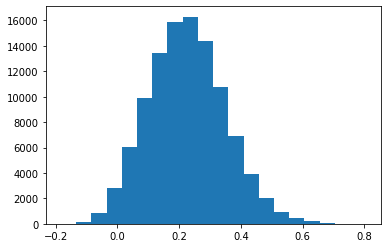

In [ ]:
import matplotlib.pyplot as plt
plot = plt.hist(two_sent_distribution, bins=20)

One sentence window

In [ ]:
one_sent_distribution = []
for i in tqdm(range(0,200)):
  doc = data[i]
  q_embs = []
  for pair in doc['Q_A_pairs']:
    q_embs.append(model.encode(pair[0]))
  for expo_seg in doc['expo']:
    lis = re.split("\. ", expo_seg)
    for expo_sent in lis:
      expo_emb = model.encode(expo_sent)
      for q_emb_id in range(len(q_embs)):
        q_emb = q_embs[q_emb_id]
      
        score = 1 - distance.cosine(expo_emb, q_emb)
        one_sent_distribution.append([score, (expo_sent, pair[0])])
        # if score > 0.60:
        #   print(1 - distance.cosine(expo_emb, q_emb))
        #   print("expo sent:")
        #   pprint(expo_sent)
        #   print("question:")
        #   pprint(doc['Q_A_pairs'][q_emb_id][0])
        #   # print("answers:")
        #   # pprint(pairs[1])
        #   print("==================================")

  0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2227: UserWarning: `max_length` is ignored when `padding`=`True`.
  warnings.warn("`max_length` is ignored when `padding`=`True`.")


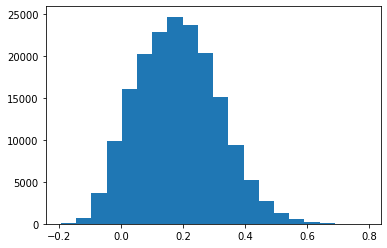

In [ ]:
plot = plt.hist(one_sent_distribution, bins=20)

In [ ]:
one_sent_distribution = sorted(one_sent_distribution, key=lambda x: x[0])

In [ ]:
print(len(one_sent_distribution))

176797


In [ ]:
pprint(one_sent_distribution[-70])

[0.6666470170021057,
 ("These are just a few examples of the progress we've made and how the Optum "
  'businesses are advancing the way they serve in both their individual and '
  'market segments',
  'Going back to the history, is there any talent with embedded into the 2019 '
  'guidance now for midyear commercial intervals that they can return to the '
  'fee for the 2020 months of similar to what you saw in 2017?')]


FinBERT

In [ ]:
!pip install wrapt --upgrade --ignore-installed
!pip install finbert-embedding==0.1.4

     |████████████████████████████████| 79 kB 3.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires wrapt~=1.12.1, but you have wrapt 1.13.1 which is incompatible.


     |████████████████████████████████| 123 kB 5.3 MB/s 
     |████████████████████████████████| 676.9 MB 3.2 kB/s 
     |████████████████████████████████| 131 kB 48.5 MB/s 
     |████████████████████████████████| 79 kB 6.0 MB/s 
     |████████████████████████████████| 8.0 MB 47.1 MB/s 
     |████████████████████████████████| 138 kB 47.5 MB/s 
     |████████████████████████████████| 127 kB 66.1 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68721 sha256=70381ef97ab9e0a54454b58ca54e925c5fa6ca7139f008d5e9045d0b5fc98ca6
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.13.1
    Uninstalling wrapt-1.13.1:
      Successfully uninstalled wrapt-1

In [ ]:
from finbert_embedding.embedding import FinbertEmbedding
text = 'I hate bert I love bert'
model = FinbertEmbedding()
sentence_embedding = model.sentence_vector(text)
sentence_embedding

408002560/407986644 [==============================] - 8s 0us/step


tensor([ 4.2587e-01,  5.8712e-01,  1.7011e-01, -6.6319e-02,  1.9129e-01,
         1.8615e-01,  1.6038e-02,  5.5216e-01, -6.0904e-03, -4.5338e-02,
         5.8425e-02, -3.1005e-01,  6.9560e-02,  3.8050e-01,  1.5844e-01,
         5.4277e-01,  2.3190e-01,  6.6454e-02, -1.1035e-01,  4.8519e-01,
         1.2129e-01,  2.0029e-01, -1.1718e-01,  1.6896e-01,  2.6487e-01,
         5.6975e-02,  1.8427e-01, -2.7809e-01, -1.9570e-01, -2.5814e-01,
         3.9881e-01, -1.5019e-01,  8.2206e-02,  1.0153e-01, -1.2616e-01,
        -1.8498e-01, -1.0958e-01,  1.6678e-01, -9.2019e-02,  2.0886e-02,
        -1.7122e-01, -2.5610e-01, -2.8101e-01, -3.1698e-02, -6.1618e-02,
        -1.3417e-01,  5.0184e-01,  2.5176e-01,  4.7295e-01, -2.0146e-01,
         1.6118e-01,  3.7093e-01,  3.4652e-02,  1.1972e-01,  1.8251e-01,
         3.6014e-01, -1.8570e-01, -5.8858e-01, -6.9161e-01,  7.7455e-02,
         3.1459e-01, -1.2914e-01,  4.3699e-01,  4.5625e-02, -2.2357e-01,
         5.4445e-01,  8.9495e-03,  5.0448e-02, -6.1

Two Sentence Window

In [ ]:
two_sent_distribution = []
for i in tqdm(range(0,200)):
  doc = data[i]
  q_embs = []
  for pair in doc['Q_A_pairs']:
    q_embs.append(model.sentence_vector(pair[0]))
  for expo_seg in doc['expo']:
    lis = re.split("(\. )", expo_seg)

    j = 0
    joint_lis = []
    while  j < len(lis)-1:
      joint_lis.append(lis[j] + lis[j+1])
      j = j + 2
    joint_lis.append(lis[-1])

    for h in range(len(joint_lis)-1):
      
      if h != len(joint_lis) - 1:
        expo_sent = joint_lis[h] + joint_lis[h+1]
      else:
        expo_sent = joint_lis[h]
      expo_emb = model.sentence_vector(expo_sent)
      for q_emb_id in range(len(q_embs)):
        q_emb = q_embs[q_emb_id]
      
        score = 1 - distance.cosine(expo_emb, q_emb)
        two_sent_distribution.append([score, (expo_sent, pair[0])])
        #if score > 0.8:
          # print(1 - distance.cosine(expo_emb, q_emb))
          # print("expo sent:")
          # pprint(expo_sent)
          # print("question:")
          # pprint(doc['Q_A_pairs'][q_emb_id][0])
          # print("answers:")
          # pprint(pairs[1])
          #print("==================================")

  0%|          | 0/200 [00:00<?, ?it/s]

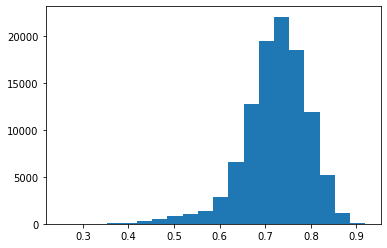

In [ ]:
plot = plt.hist(two_sent_distribution, bins=20)

In [ ]:
two_sent_distribution = sorted(two_sent_distribution, key=lambda x: x[0])

In [ ]:
pprint(two_sent_distribution[-21])

[0.9028043746948242,
 ('SYMKEVI launch in Germany is off to a strong start, with demand coming from '
  'patients who never initiated treatment with ORKAMBI as well as patients who '
  'discontinued or have switched from ORKAMBI. Throughout 2019, we anticipated '
  'additional patients will initiate treatment with SYMDEKO in the U.S. ',
  'So I guess my question is why not just submit both for approval and start '
  'to build that database and let patients and physicians ultimately decide '
  "which is the better triple combination when we have -- there's enough "
  'information out there to decide if there are subtle differences?')]


One Sentence Window

In [ ]:
one_sent_distribution = []
for i in tqdm(range(0,200)):
  doc = data[i]
  q_embs = []
  for pair in doc['Q_A_pairs']:
    q_embs.append(model.sentence_vector(pair[0]))
  for expo_seg in doc['expo']:
    lis = re.split("\. ", expo_seg)
    for expo_sent in lis:
      expo_emb = model.sentence_vector(expo_sent)
      for q_emb_id in range(len(q_embs)):
        q_emb = q_embs[q_emb_id]
      
        score = 1 - distance.cosine(expo_emb, q_emb)
        one_sent_distribution.append([score, (expo_sent, pair[0])])
        # if score > 0.60:
        #   print(1 - distance.cosine(expo_emb, q_emb))
        #   print("expo sent:")
        #   pprint(expo_sent)
        #   print("question:")
        #   pprint(doc['Q_A_pairs'][q_emb_id][0])
        #   # print("answers:")
        #   # pprint(pairs[1])
        #   print("==================================")

  0%|          | 0/200 [00:00<?, ?it/s]

Tuned BERT

In [1]:
!pip install transformers
import transformers

     |████████████████████████████████| 2.9 MB 9.6 MB/s 
     |████████████████████████████████| 895 kB 47.1 MB/s 
     |████████████████████████████████| 3.3 MB 47.2 MB/s 
     |████████████████████████████████| 56 kB 3.9 MB/s 
     |████████████████████████████████| 596 kB 48.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [53]:
from scipy.spatial import distance
import numpy as np
import re
from tqdm.notebook import tqdm
from pprint import pprint

In [5]:
%cd drive/MyDrive/Finance\ QA/

/content/drive/.shortcut-targets-by-id/1iz5ONPloFwqdHSl7OCOYnLOYblLdLyPZ/Finance QA


In [6]:
WEIGHT_PATH = 'bertMLM_Jason/weights/bertMLM'

In [8]:
from transformers import BertTokenizer, BertForMaskedLM
import torch
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForMaskedLM.from_pretrained(WEIGHT_PATH)

In [10]:
s = "shit happens and please do not take a shit"
print(tokenizer(s).keys())

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])


In [46]:
def get_bert_embedding(model, sent):
  inputs = tokenizer(sent, return_tensors="pt")
  with torch.no_grad():
    outputs = model(**inputs, output_hidden_states=True, output_attentions=True)
    last_state = outputs.hidden_states[-1][0]
    #print(last_state.shape)
    sent_emb = torch.sum(last_state, dim=0)/last_state.shape[0]
    #print(sent_emb.shape)
  return sent_emb

In [60]:
two_sent_distribution = []
for i in tqdm(range(0,200)):
  doc = data[i]
  q_embs = []
  for pair in doc['Q_A_pairs']:
    q_embs.append(get_bert_embedding(model, pair[0]))
  for expo_seg in doc['expo']:
    lis = re.split("(\. )", expo_seg)

    j = 0
    joint_lis = []
    while  j < len(lis)-1:
      joint_lis.append(lis[j] + lis[j+1])
      j = j + 2
    joint_lis.append(lis[-1])

    for h in range(len(joint_lis)-1):
      
      if h != len(joint_lis) - 1:
        expo_sent = joint_lis[h] + joint_lis[h+1]
      else:
        expo_sent = joint_lis[h]
      expo_emb = get_bert_embedding(model, expo_sent)
      for q_emb_id in range(len(q_embs)):
        q_emb = q_embs[q_emb_id]
      
        score = 1 - distance.cosine(expo_emb, q_emb)
        two_sent_distribution.append([score, (expo_sent, pair[0])])
        if score > 0.87:
          print(1 - distance.cosine(expo_emb, q_emb))
          print("expo sent:")
          pprint(expo_sent)
          print("question:")
          pprint(doc['Q_A_pairs'][q_emb_id][0])
          print("answers:")
          pprint(pair[1])
          print("==================================")

  0%|          | 0/200 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
 'Right. Thank you, John. Thank you all. So I’d just like to maybe sum up '
 'where we are, as we close out this call. UnitedHealth Group ended the first '
 'half of 2019 with considerable momentum delivering strong, well balanced '
 "earnings growth across all of our businesses. It's with confidence that "
 "we're expanding -- with our expanding capabilities and available growth "
 'opportunities that we increased our outlook for full year adjusted earnings '
 'per share.\n'
 'Optum and UnitedHealthcare both perform strongly in the quarter. Both are '
 'focused on lowering costs and improving health outcomes and the consumer '
 'experience as they seek to help advance the next generation health system in '
 'a socially conscious way. A system that provides high quality, efficient and '
 'fair access for all. This concludes our call today. Thank you for joining '
 'us.')
0.8830413818359375
expo sent:
('We remain confident as we look fo

KeyboardInterrupt: ignored

In [58]:
score = []
for i in two_sent_distribution:
  score.append(i[0])

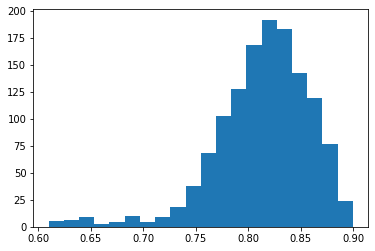

In [59]:
import matplotlib.pyplot as plt
plot = plt.hist(score, bins=20)